# "Problèmes classiques de la théorie des graphes"

In [1]:
from dirmaths import *
import numpy as np
from math import inf

In [2]:
print(inf > 9999)
print(inf + 82 == inf)
print(inf + 1 > inf)
print(inf*(-72) == -inf)

True
True
False
True


## 1. Graphes valués

### 1.1 Matrice de poids

In [3]:
MV = np.array([ [inf,2,4,3,6],
                [2,inf,7,inf,inf],
                [4,7,inf,2,8],
                [3,inf,2,inf,1],
                [6,inf,8,1,inf]])

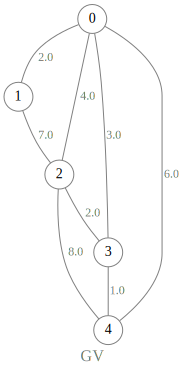

In [4]:
display(MV,weighted=True,directed=False,title="GV",dispo='dot')

### 1.2 Exercice : construction d'un graphe valué

In [5]:
MV2 = np.array([[inf,8,2,inf,inf],
                [inf,inf,inf,1,inf],
                [inf,5,inf,11,1],
                [inf,inf,inf,inf,inf],
                [inf,inf,inf,9,inf]])

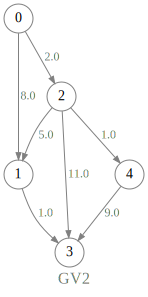

In [6]:
display(MV2,weighted=True,title="GV2",dispo="dot")

## 2. Problème du plus court chemin

### 2.1 Exercice : algorithme de Bellman

In [7]:
def bellman(M: list) -> list:
    Dist = len(M)*[inf]
    Dist[0] = 0
    nb = 1
    while nb == 1:
        nb = 0
        for i in range(len(M)):
            for j in range(len(M)):
                if Dist[i] + M[i,j] < Dist[j]:
                    nb = 1
                    Dist[j] = Dist[i] + M[i,j]
    return Dist

In [8]:
bellman(MV2)

[0, 7.0, 2.0, 8.0, 3.0]

### 2.2 Exercice : algorithme de Dijkstra

In [9]:
def dij(M: list) -> list:
    Dist = len(M)*[inf]
    Dist[0] = 0
    marquage = len(M)*[False]
    minimum = inf
    while False in marquage:
        minimum = inf
        for k in range(len(Dist)):
            if (Dist[k] < minimum) and (marquage[k] == False):
                minimum = Dist[k]
                i = k
        marquage[i] = True
        for j in range(len(M)):
                if Dist[i] + M[i,j] < Dist[j]:
                    Dist[j] = Dist[i] + M[i,j]
    return Dist

In [10]:
dij(MV2)

[0, 7.0, 2.0, 8.0, 3.0]

### 2.3 Application : ordonnancement

In [11]:
def bellman_long(M: list) -> list:
    Dist = len(M)*[-inf]
    Dist[0] = 0
    nb = 1
    while nb:
        nb = 0
        for i in range(len(M)):
            for j in range(len(M[i])):
                if (Dist[i] + M[i,j] > Dist[j]) and (Dist[i] + M[i,j] < inf):
                    nb = 1
                    Dist[j] = Dist[i] + M[i,j]
    return Dist

In [12]:
bellman_long(MV2)

[0, 8.0, 2.0, 13.0, 3.0]

In [13]:
A = np.array([ [inf,0,inf,5,inf],
               [inf,inf,12,7,inf],
               [inf,inf,inf,inf,6],
               [inf,inf,4,inf,inf],
               [inf,inf,inf,inf,inf]])

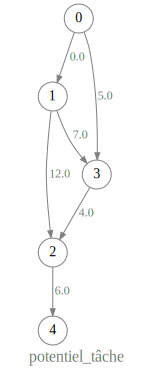

In [14]:
display(A,weighted=True,directed=True,title='potentiel_tâche',dispo='dot')

In [15]:
bellman_long(A)

[0, 0.0, 12.0, 7.0, 18.0]

## 3. Bonus : algorithme de Prim

### 3.1 Enoncé du problème

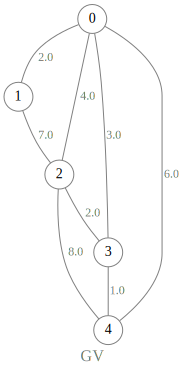

In [16]:
display(MV,weighted=True,directed=False,title="GV",dispo='dot')

### 3.2 Algorithme de Prim

In [17]:
def prim(M: list) -> list:
    n = len(M)
    marquage = [M[0][0]]
    arbre = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            arbre[i][j] = inf
    while len(marquage) < n:
        poidsMin = np.inf
        distMin = None
        for i in range(n):
            for j in range(n):
                if j not in marquage and M[i][j] < poidsMin:
                    poidsMin = M[i][j]
                    distMin = (i, j)
        marquage += [distMin[1]]
        arbre[distMin] = poidsMin
    return arbre

In [18]:
prim(MV)

array([[inf,  2., inf, inf, inf],
       [ 2., inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf,  1.],
       [inf, inf, inf,  1., inf]])